In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#Loading Dataset
data = pd.read_csv("C:\\Users\\bhimr\\Downloads\\archive (33)\\glass.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [4]:
data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [6]:
#Dropping the ID column
data1 = data.drop(['Id'],axis = 1)

In [7]:
#Treating Outliers
columns = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
for column in columns:
     Q1 = data1[column].quantile(0.25)
     Q3 = data1[column].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
     data1[column] = np.where((data1[column] < lower_bound) | (data1[column] > upper_bound),data1[column].median(),data1[column])


In [8]:
data1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.0,214.000000,214.000000
mean,1.517881,13.428738,2.684533,1.383692,72.705093,0.415070,8.644393,0.0,0.038832,2.780374
std,0.001877,0.662438,1.442408,0.338015,0.535759,0.259124,0.587123,0.0,0.071359,2.103739
min,1.512990,11.560000,0.000000,0.560000,71.150000,0.000000,6.930000,0.0,0.000000,1.000000
25%,1.516558,12.962500,2.115000,1.202500,72.380000,0.122500,8.285000,0.0,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.552500,8.600000,0.0,0.000000,2.000000
75%,1.518503,13.797500,3.600000,1.560000,73.067500,0.600000,8.890000,0.0,0.067500,3.000000
max,1.523000,15.150000,4.490000,2.270000,73.880000,1.100000,10.560000,0.0,0.250000,7.000000


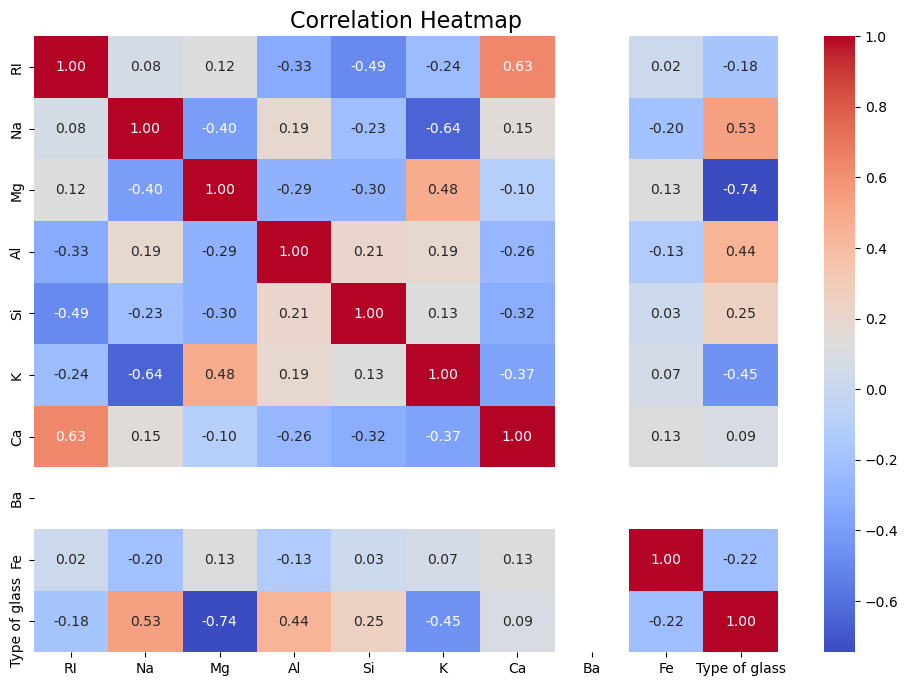

In [9]:
# Compute the correlation matrix
corr_matrix = data1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [10]:
#Standarizing the numerical columns of the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)

In [11]:
x = data1.iloc[:,0:-1]

In [12]:
y = data1.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [14]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# Train the model
rf_model.fit(x_train, y_train)
# Predict on the test set
y_pred = rf_model.predict(x_test)

In [15]:
#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [16]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.8837209302325582
0.8986710963455149
0.8837209302325582
0.881594684385382


In [17]:
#Bagging Model
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
# Train the Bagging model
bagging_model.fit(x_train, y_train)
# Predict on the test set
y_pred_bagging = bagging_model.predict(x_test)

In [18]:
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("Bagging Performance:")
print(f"Accuracy: {accuracy_bagging:.2f}")
print(f"Precision: {precision_bagging:.2f}")
print(f"Recall: {recall_bagging:.2f}")
print(f"F1-Score: {f1_bagging:.2f}")

Bagging Performance:
Accuracy: 0.77
Precision: 0.78
Recall: 0.77
F1-Score: 0.76


In [19]:
# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Train the Gradient Boosting model
gb_model.fit(x_train, y_train)
# Predict on the test set
y_pred_gb = gb_model.predict(x_test)

In [20]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1-Score: {f1_gb:.2f}")

Gradient Boosting Performance:
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1-Score: 0.77


In [21]:
# Create a DataFrame to compare results
results = pd.DataFrame({
    'Method': ['Bagging', 'Gradient Boosting'],
    'Accuracy': [accuracy_bagging, accuracy_gb],
    'Precision': [precision_bagging, precision_gb],
    'Recall': [recall_bagging, recall_gb],
    'F1-Score': [f1_bagging, f1_gb]
})

print("\nComparison of Results:\n")
print(results)


Comparison of Results:

              Method  Accuracy  Precision    Recall  F1-Score
0            Bagging  0.767442   0.775850  0.767442  0.755118
1  Gradient Boosting  0.767442   0.770125  0.767442  0.765504


In [22]:
#Almost both methods result are same

In [23]:
#Bagging creates multiple versions of the model using different random subsets (with replacement) of the training data and then combines their predictions.
#Boosting also creates multiple models, but each model is trained to correct the errors made by the previous ones. 
#The models are built sequentially, and each subsequent model focuses more on the misclassified instances.
#Difference : Training Process: Bagging trains models independently, while boosting trains models sequentially, focusing on the errors of previous models.
#Focus: Bagging focuses on reducing variance, while boosting aims to reduce both bias and variance.

In [24]:
#imbalanced data, where certain classes are underrepresented, can lead to poor model performance. 
#methods : Oversampling: Increase the number of instances in the minority class (e.g., SMOTE - Synthetic Minority Over-sampling Technique).
#Undersampling: Reduce the number of instances in the majority class.
#Class Weights: Assign higher weights to the minority class during model training so that the model focuses more on the underrepresented class.
